In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
book_details = pd.read_csv('/content/books.csv',encoding = 'latin1',index_col = 0)
book_details

,User.ID,Book.Title,Book.Rating
1,276726.0,Classical Mythology,5.0
2,276729.0,Clara Callan,3.0
3,276729.0,Decision in Normandy,6.0
4,276736.0,Flu: The Story of the Great Influenza Pandemic...,8.0
5,276737.0,The Mummies of Urumchi,6.0
...,...,...,...
9048,161480.0,Further Tales of the City (Tales of the City S...,9.0
9049,161480.0,Kristin Lavransdatter: The Cross (Kristin Lavr...,8.0
9050,161480.0,Room Temperature: A Novel,7.0
9051,161480.0,The Island of the Colorblind,9.0


In [ ]:
book_details.columns = ["UserID","BookTitle","BookRating"]
book_details

,UserID,BookTitle,BookRating
1,276726.0,Classical Mythology,5.0
2,276729.0,Clara Callan,3.0
3,276729.0,Decision in Normandy,6.0
4,276736.0,Flu: The Story of the Great Influenza Pandemic...,8.0
5,276737.0,The Mummies of Urumchi,6.0
...,...,...,...
9048,161480.0,Further Tales of the City (Tales of the City S...,9.0
9049,161480.0,Kristin Lavransdatter: The Cross (Kristin Lavr...,8.0
9050,161480.0,Room Temperature: A Novel,7.0
9051,161480.0,The Island of the Colorblind,9.0


In [ ]:
book_details.sort_values(['UserID'])

,UserID,BookTitle,BookRating
2400,8.0,Ancient Celtic Romances,5.0
2406,8.0,The Art Of Celtia,7.0
2405,8.0,The Celts Activity Book,6.0
2401,8.0,The Western way: A practical guide to the West...,5.0
2403,8.0,Truckers,5.0
...,...,...,...
2396,278854.0,La crÌ?nica del PerÌ¼ (CrÌ?nicas de AmÌ©rica),7.0
2397,278854.0,Blast From the Past,7.0
2398,278854.0,"A Treasury of Irish Myth, Legend, and Folklore",6.0
2399,278854.0,Celtic Mythology (Library of the World's Myths...,8.0


In [ ]:
len(book_details['UserID'].unique())

2012

In [ ]:
len(book_details['BookTitle'].unique())

8763

In [ ]:
len(book_details['BookRating'].unique())

11

In [ ]:
book_details.loc[book_details['BookRating'] == 'small', 'BookRating'] = 0
book_details.loc[book_details['BookRating'] == 'large', 'BookRating'] = 1

In [ ]:
book_details.BookRating.value_counts()

8.0     2061
7.0     1912
10.0    1540
9.0     1363
5.0      897
6.0      849
4.0      207
3.0      130
2.0       51
1.0       41
Name: BookRating, dtype: int64

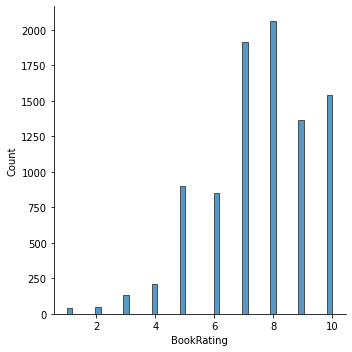

In [ ]:
sns.displot(book_details.BookRating)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


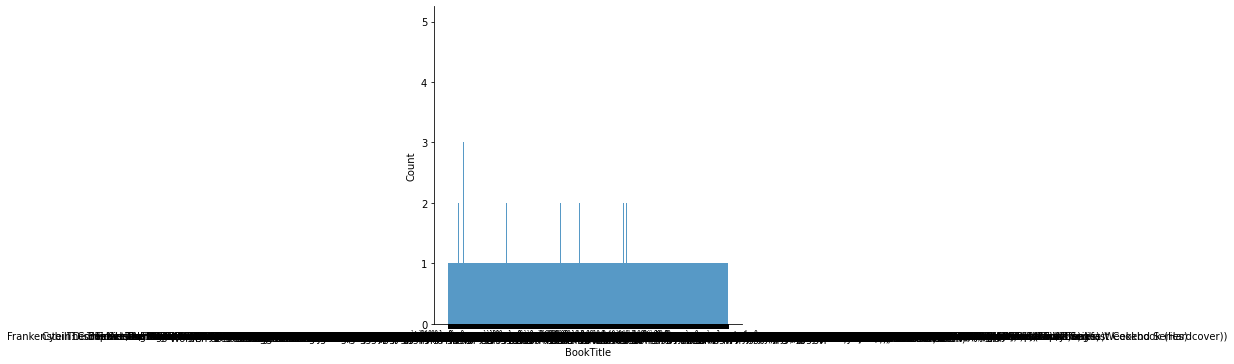

In [ ]:
sns.displot(book_details.BookTitle)

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
book_details_corr = book_details.pivot_table(index= 'UserID',columns= 'BookTitle',values= 'BookRating').reset_index(drop =True)
book_details_corr

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ì?å?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_details_corr.fillna(0,inplace = True)
book_details_corr

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ì?å?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_sim_1 = 1 - pairwise_distances(book_details_corr.values,metric = 'cosine')
book_sim_1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
book_sim_2 = pd.DataFrame(book_sim_1)
book_sim_2

,0,1,2,3,4,5,6,7,8,9,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
book_sim_2.index = book_details['UserID'].unique()
book_sim_2.columns = book_details['UserID'].unique()
book_sim_2

In [ ]:
np.fill_diagonal(book_sim_1,0)
book_sim_2

,0,1,2,3,4,5,6,7,8,9,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_sim_2.idxmax(axis = 1)
print(book_sim_2.max(axis = 1).sort_values(ascending = False).head(50))

427     1.000000
1830    1.000000
359     1.000000
1235    1.000000
1799    1.000000
1805    1.000000
657     1.000000
1814    1.000000
1551    1.000000
1425    1.000000
1101    1.000000
561     1.000000
1100    1.000000
1454    1.000000
721     1.000000
364     0.752577
1402    0.707107
28      0.707107
1407    0.668965
1963    0.668965
1537    0.662266
1839    0.662266
1768    0.613941
1826    0.613941
994     0.549972
1642    0.549972
1643    0.515325
1633    0.515325
1534    0.502571
1413    0.502571
1954    0.500000
1743    0.498464
565     0.498464
137     0.495904
1072    0.495904
1767    0.476290
1390    0.476290
1187    0.463241
705     0.463241
1124    0.453638
1180    0.453638
1657    0.437426
323     0.437426
375     0.374270
883     0.374270
399     0.336336
1855    0.336336
192     0.331744
1538    0.331744
1452    0.317461
dtype: float64


In [ ]:
book_details[(book_details['UserID']==3473) | (book_details['UserID']==3910)]

,UserID,BookTitle,BookRating
6719,3473.0,Second Ring of Power,4.0
7704,3910.0,The Call of Service: A Witness to Idealism,7.0


In [ ]:
book_details[(book_details['UserID']==3402) | (book_details['UserID']==4301)]

,UserID,BookTitle,BookRating
6662,3402.0,Grassroots Resistance: Social Movements in Twe...,8.0
8257,4301.0,A Whole New Light,7.0


In [ ]:
book_details[(book_details['UserID']==2045) | (book_details['UserID']==3111)]

,UserID,BookTitle,BookRating
4847,2045.0,BK DUN COW,6.0
6210,3111.0,One World: The Ethics of Globalization,5.0


In [ ]:
book_details[(book_details['UserID']==92)]

,UserID,BookTitle,BookRating
2452,92.0,The Boys and Their Baby (Stonewall Inn Editions),7.0
2453,92.0,Gay Ideas: Outing and Other Controversies,8.0
2454,92.0,The gay liberation book,10.0


In [ ]:
book_details[(book_details['UserID']==367)]

,UserID,BookTitle,BookRating
2765,367.0,Diary of a Mad Bride (Summer Display Opportunity),9.0
